# Initial Setup

In [2]:
import pandas as pd
import numpy as np
import xlrd
import matplotlib.pyplot as plt
import os

dir_name = "/Users/raph/Desktop/DESKTOP/Data/photos/"
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
plt.rcParams["savefig.directory"] = os.chdir(os.path.dirname(dir_name))

/var/folders/qg/90z639dn6ws7fn4d4_jsyky40000gn/T/ipykernel_90806/3087096958.py:10: MatplotlibDeprecationWarning: Support for setting an rcParam that expects a str value to a non-str value is deprecated since 3.5 and support will be removed two minor releases later.
  plt.rcParams["savefig.directory"] = os.chdir(os.path.dirname(dir_name))


In [3]:
xls = pd.ExcelFile('/Users/raph/Desktop/DESKTOP/VaR2006-2022.xlsx')
PH_VaR = pd.read_excel(xls,'PH')
PH_VaR['Date'] = pd.to_datetime(PH_VaR['Date'])
PH_VaR = PH_VaR.set_index('Date')


MY_VaR = pd.read_excel(xls,'MY')
MY_VaR['Date'] = pd.to_datetime(MY_VaR['Date'])
MY_VaR = MY_VaR.set_index('Date')

SG_VaR = pd.read_excel(xls,'SG')
SG_VaR['Date'] = pd.to_datetime(SG_VaR['Date'])
SG_VaR = SG_VaR.set_index('Date')

TH_VaR = pd.read_excel(xls,'TH')
TH_VaR['Date'] = pd.to_datetime(TH_VaR['Date'])
TH_VaR = TH_VaR.set_index('Date')

VT_VaR = pd.read_excel(xls,'VT')
VT_VaR['Date'] = pd.to_datetime(VT_VaR['Date'])
VT_VaR = VT_VaR.set_index('Date')


In [4]:
start_date = '2006-01-01' #yyyy-mm-dd
end_date = '2022-01-01'


#Philippines
PH = pd.read_csv('/Users/raph/Desktop/GitHub/thesis199.11/data/2006-2021/PSEi.csv')
PH['Date'] = pd.to_datetime(PH['Date'])
PH = PH.rename(columns={'Price': 'Close'})
PH = PH.replace(',','', regex=True)
PH['Close'] = PH['Close'].astype(float, errors = 'raise')
mask = (PH['Date'] >= start_date) & (PH['Date'] <= end_date)
PH = PH.loc[mask]
PH = PH.set_index('Date')
PH = PH.sort_index(axis=0, ascending = False)

#Malaysia
MY = pd.read_csv('/Users/raph/Desktop/GitHub/thesis199.11/data/2006-2021/^KLSE.csv')
MY['Date'] = pd.to_datetime(MY['Date'])
MY = MY.rename(columns={'Price': 'Close'})
MY = MY.replace(',','', regex=True)
MY['Close'] = MY['Close'].astype(float, errors = 'raise')
mask = (MY['Date'] >= start_date) & (MY['Date'] <= end_date)
MY = MY.loc[mask]
MY = MY.set_index('Date')
MY = MY.sort_index(axis=0, ascending = False).dropna()

#Signapore
SG = pd.read_csv('/Users/raph/Desktop/GitHub/thesis199.11/data/2006-2021/STI.csv')
SG['Date'] = pd.to_datetime(SG['Date'])
SG = SG.replace(',','', regex=True)
SG['Close'] = SG['Close'].astype(float, errors = 'raise')
mask = (SG['Date'] >= start_date) & (SG['Date'] <= end_date)
SG = SG.loc[mask]
SG= SG.set_index('Date')
SG = SG.sort_index(axis=0, ascending = False).dropna()

#Thailand
TH = pd.read_csv('/Users/raph/Desktop/GitHub/thesis199.11/data/2006-2021/SETi.csv')
TH['Date'] = pd.to_datetime(TH['Date'])
TH = TH.rename(columns={'Price': 'Close'})
TH = TH.replace(',','', regex=True)
TH['Close'] = TH['Close'].astype(float, errors = 'raise')
mask = (TH['Date'] >= start_date) & (TH['Date'] <= end_date)
TH = TH.loc[mask]
TH= TH.set_index('Date')
TH = TH.sort_index(axis=0, ascending = False).dropna()

#Vietnam
VT = pd.read_csv('/Users/raph/Desktop/GitHub/thesis199.11/data/2006-2021/HNX.csv')
VT['Date'] = pd.to_datetime(VT['Date'])
VT = VT.rename(columns={'Price': 'Close'})
VT = VT.replace(',','', regex=True)
VT['Close'] = VT['Close'].astype(float, errors = 'raise')
mask = (VT['Date'] >= start_date) & (VT['Date'] <= end_date)
VT = VT.loc[mask]
VT= VT.set_index('Date')
VT = VT.sort_index(axis=0, ascending = False).dropna()

def no_to_test(df, prediction_size):
    return int(np.ceil(len(df)*prediction_size))

def get_returns(df,d):
    '''
    The function obtains the log returns of the asset shifted d days
    
    PARAMETERS
    ----------
    df : pandas.DataFrame
        The data frame contains data of a chosen stock index 
        (Stock index must be arrange in DESCENDING ORDER by DATE)
    d : int
        The dth day being forecast
        (Assumed to be 1 for most cases)
        
    RETURNS
    -------
    df : pandas.DataFrame
        The data frame returns an updated data frame containing the
        'Returns' column
    '''
    df['Previous'] = df['Close'].shift(-d)
    df['Returns'] = np.log(df['Close']/df['Previous'])*100
#     display(df.head(1))
    return df

PH = get_returns(PH, 1)
MY = get_returns(MY, 1)
SG = get_returns(SG, 1)
TH = get_returns(TH, 1)
VT = get_returns(VT, 1)

# Creation of Graphs

## Standard Graphs

In [100]:
prediction_size = 0.2
name = 'VaR_StndModels_0.01'


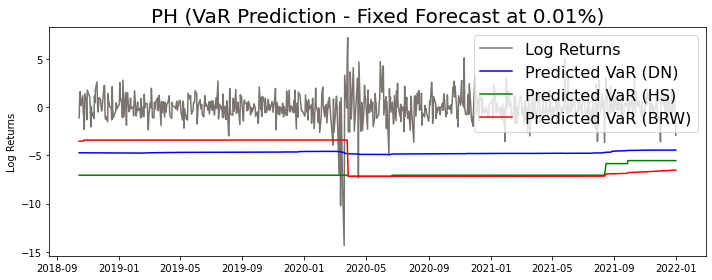

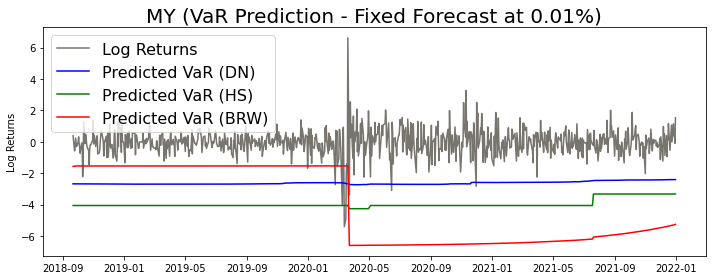

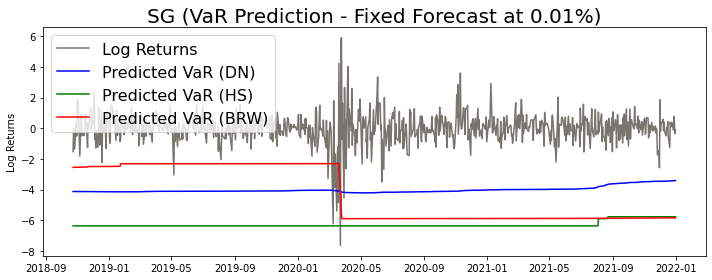

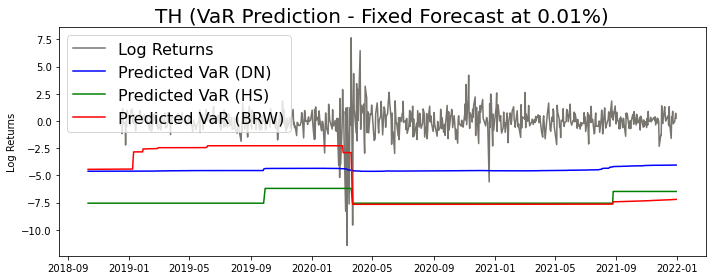

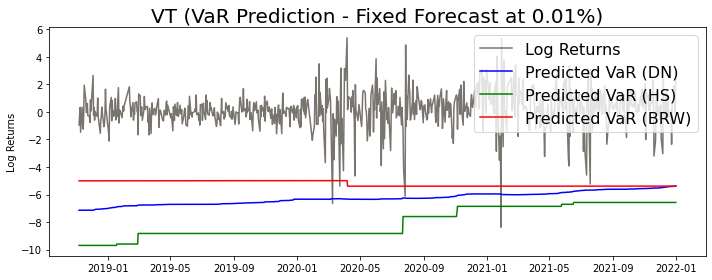

In [101]:
#Philippines
plt.figure(figsize=(10,4))
plt.plot(PH['Returns'].iloc[:-(len(PH)-no_to_test(PH, prediction_size))], color = '#78746E')
plt.plot(-PH_VaR.FWDN001, color = 'b')
plt.plot(-PH_VaR.FWHS001, color = 'g')
plt.plot(-PH_VaR.FWBRW001, color = 'r')
plt.ylabel('Log Returns')
plt.title('PH (VaR Prediction - Fixed Forecast at 0.01%)', fontsize=20)
plt.legend(['Log Returns', 'Predicted VaR (DN)', 'Predicted VaR (HS)', 'Predicted VaR (BRW)'], fontsize=16)
plt.savefig("PH_"+name+".png")

#Malaysia
plt.figure(figsize=(10,4))
plt.plot(MY['Returns'].iloc[:-(len(MY)-no_to_test(MY, prediction_size))], color = '#78746E')
plt.plot(-MY_VaR.FWDN001, color = 'b')
plt.plot(-MY_VaR.FWHS001, color = 'g')
plt.plot(-MY_VaR.FWBRW001, color = 'r')
plt.ylabel('Log Returns')
plt.title('MY (VaR Prediction - Fixed Forecast at 0.01%)', fontsize=20)
plt.legend(['Log Returns', 'Predicted VaR (DN)', 'Predicted VaR (HS)', 'Predicted VaR (BRW)'], fontsize=16)
plt.savefig("MY_"+name+".png")

#Singapore
plt.figure(figsize=(10,4))
plt.plot(SG['Returns'].iloc[:-(len(SG)-no_to_test(SG, prediction_size))], color = '#78746E')
plt.plot(-SG_VaR.FWDN001, color = 'b')
plt.plot(-SG_VaR.FWHS001, color = 'g')
plt.plot(-SG_VaR.FWBRW001, color = 'r')
plt.ylabel('Log Returns')
plt.title('SG (VaR Prediction - Fixed Forecast at 0.01%)', fontsize=20)
plt.legend(['Log Returns', 'Predicted VaR (DN)', 'Predicted VaR (HS)', 'Predicted VaR (BRW)'], fontsize=16)
plt.savefig("SG_"+name+".png")

#Thailand
plt.figure(figsize=(10,4))
plt.plot(TH['Returns'].iloc[:-(len(VT)-no_to_test(VT, prediction_size))], color = '#78746E')
plt.plot(-TH_VaR.FWDN001, color = 'b')
plt.plot(-TH_VaR.FWHS001, color = 'g')
plt.plot(-TH_VaR.FWBRW001, color = 'r')
plt.ylabel('Log Returns')
plt.title('TH (VaR Prediction - Fixed Forecast at 0.01%)', fontsize=20)
plt.legend(['Log Returns', 'Predicted VaR (DN)', 'Predicted VaR (HS)', 'Predicted VaR (BRW)'], fontsize=16)
plt.savefig("TH_"+name+".png")

#Vietnam
plt.figure(figsize=(10,4))
plt.plot(VT['Returns'].iloc[:-(len(VT)-no_to_test(VT, prediction_size))], color = '#78746E')
plt.plot(-VT_VaR.FWDN001, color = 'b')
plt.plot(-VT_VaR.FWHS001, color = 'g')
plt.plot(-VT_VaR.FWBRW001, color = 'r')
plt.ylabel('Log Returns')
plt.title('VT (VaR Prediction - Fixed Forecast at 0.01%)', fontsize=20)
plt.legend(['Log Returns', 'Predicted VaR (DN)', 'Predicted VaR (HS)', 'Predicted VaR (BRW)'], fontsize=16)
plt.savefig("VT_"+name+".png")

## GARCH Models

In [47]:
prediction_size = 0.2
name = 'VaR_GIFI_001'
alpha = '0.01%'
window = 'Rolling'

### GARCH MODELS

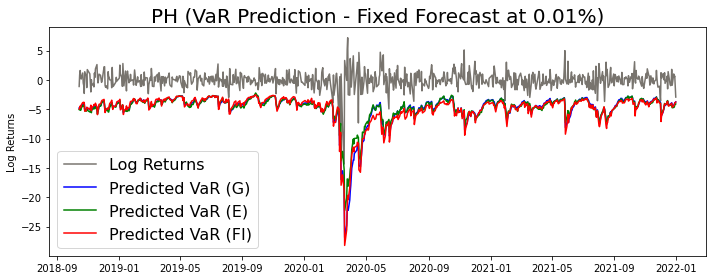

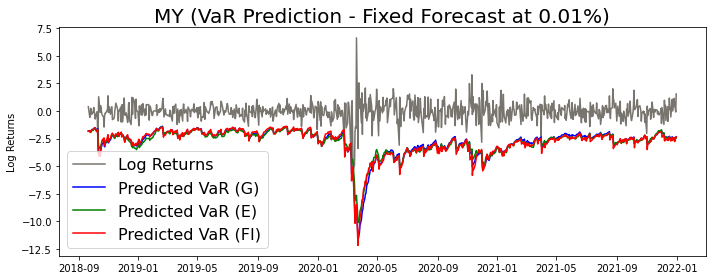

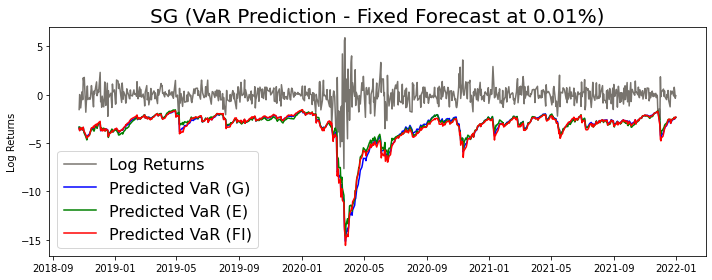

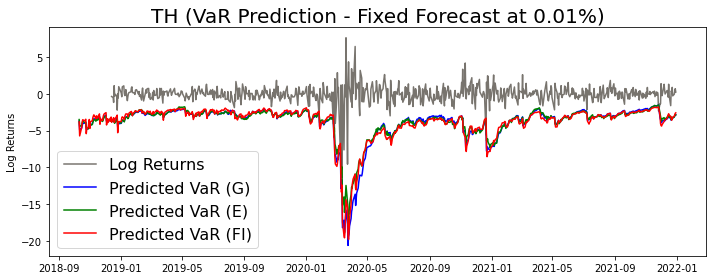

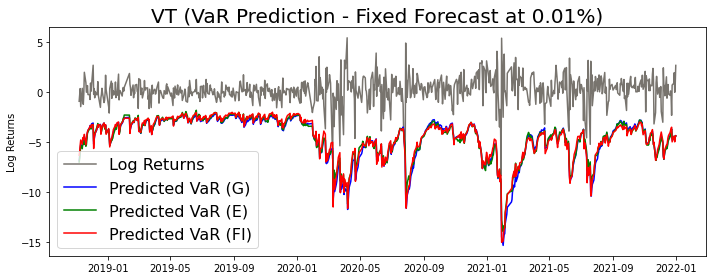

In [34]:
#Philippines
plt.figure(figsize=(10,4))
plt.plot(PH['Returns'].iloc[:-(len(PH)-no_to_test(PH, prediction_size))], color = '#78746E')
plt.plot(-PH_VaR.FWG001, color = 'b')
plt.plot(-PH_VaR.FWE001, color = 'g')
plt.plot(-PH_VaR.FWFI001, color = 'r')
plt.ylabel('Log Returns')
plt.title('PH (VaR Prediction - Fixed Forecast at 0.01%)', fontsize=20)
plt.legend(['Log Returns', 'Predicted VaR (G)', 'Predicted VaR (E)', 'Predicted VaR (FI)'], fontsize=16)
plt.savefig("PH_"+name+".png")

#Malaysia
plt.figure(figsize=(10,4))
plt.plot(MY['Returns'].iloc[:-(len(MY)-no_to_test(MY, prediction_size))], color = '#78746E')
plt.plot(-MY_VaR.FWG001, color = 'b')
plt.plot(-MY_VaR.FWE001, color = 'g')
plt.plot(-MY_VaR.FWFI001, color = 'r')
plt.ylabel('Log Returns')
plt.title('MY (VaR Prediction - Fixed Forecast at 0.01%)', fontsize=20)
plt.legend(['Log Returns', 'Predicted VaR (G)', 'Predicted VaR (E)', 'Predicted VaR (FI)'], fontsize=16)
plt.savefig("MY_"+name+".png")

#Singapore
plt.figure(figsize=(10,4))
plt.plot(SG['Returns'].iloc[:-(len(SG)-no_to_test(SG, prediction_size))], color = '#78746E')
plt.plot(-SG_VaR.FWG001, color = 'b')
plt.plot(-SG_VaR.FWE001, color = 'g')
plt.plot(-SG_VaR.FWFI001, color = 'r')
plt.ylabel('Log Returns')
plt.title('SG (VaR Prediction - Fixed Forecast at 0.01%)', fontsize=20)
plt.legend(['Log Returns', 'Predicted VaR (G)', 'Predicted VaR (E)', 'Predicted VaR (FI)'], fontsize=16)
plt.savefig("SG_"+name+".png")

#Thailand
plt.figure(figsize=(10,4))
plt.plot(TH['Returns'].iloc[:-(len(VT)-no_to_test(VT, prediction_size))], color = '#78746E')
plt.plot(-TH_VaR.FWG001, color = 'b')
plt.plot(-TH_VaR.FWE001, color = 'g')
plt.plot(-TH_VaR.FWFI001, color = 'r')
plt.ylabel('Log Returns')
plt.title('TH (VaR Prediction - Fixed Forecast at 0.01%)', fontsize=20)
plt.legend(['Log Returns', 'Predicted VaR (G)', 'Predicted VaR (E)', 'Predicted VaR (FI)'], fontsize=16)
plt.savefig("TH_"+name+".png")

#Vietnam
plt.figure(figsize=(10,4))
plt.plot(VT['Returns'].iloc[:-(len(VT)-no_to_test(VT, prediction_size))], color = '#78746E')
plt.plot(-VT_VaR.FWG001, color = 'b')
plt.plot(-VT_VaR.FWE001, color = 'g')
plt.plot(-VT_VaR.FWFI001, color = 'r')
plt.ylabel('Log Returns')
plt.title('VT (VaR Prediction - Fixed Forecast at 0.01%)', fontsize=20)
plt.legend(['Log Returns', 'Predicted VaR (G)', 'Predicted VaR (E)', 'Predicted VaR (FI)'], fontsize=16)
plt.savefig("VT_"+name+".png")

### GARCH, IGARCH, FIGARCH

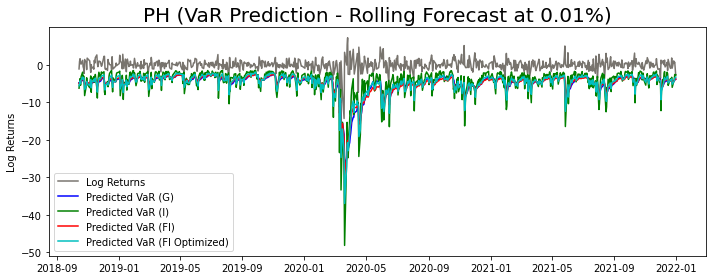

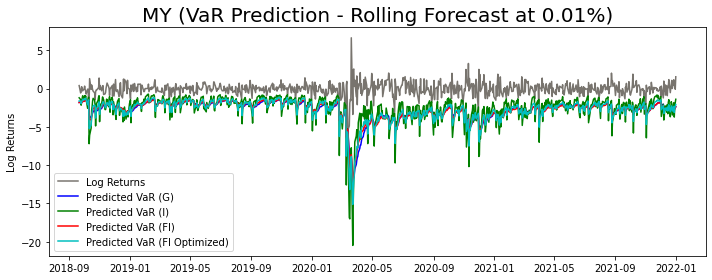

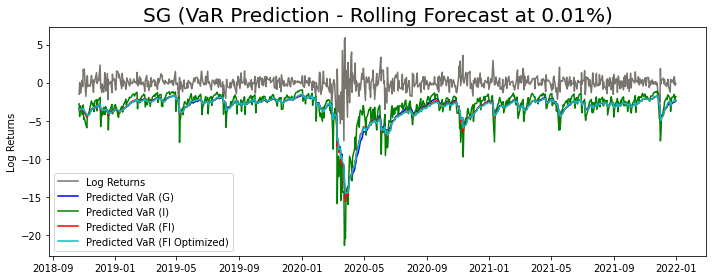

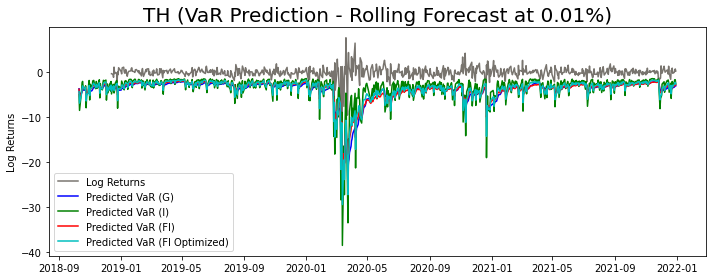

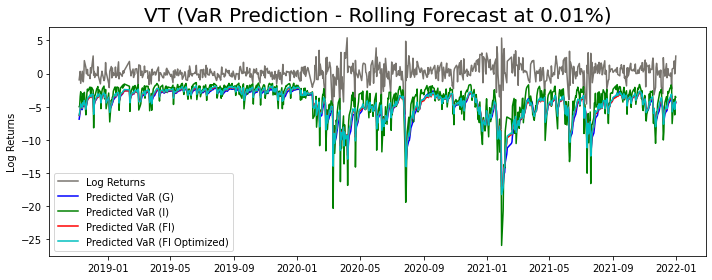

In [48]:
#Philippines
plt.figure(figsize=(10,4))
plt.plot(PH['Returns'].iloc[:-(len(PH)-no_to_test(PH, prediction_size))], color = '#78746E')
plt.plot(-PH_VaR.RWG001, color = 'b')
plt.plot(-PH_VaR.RWI001, color = 'g')
plt.plot(-PH_VaR.RWFI001, color = 'r')
plt.plot(-PH_VaR.RWOFI001, color = 'c')
plt.ylabel('Log Returns')
plt.title('PH (VaR Prediction - ' + window + ' Forecast at ' + alpha +')', fontsize=20)
plt.legend(['Log Returns', 'Predicted VaR (G)', 'Predicted VaR (I)', 'Predicted VaR (FI)', 'Predicted VaR (FI Optimized)'], fontsize=10)
plt.savefig("PH_"+name+".png")

#Malaysia
plt.figure(figsize=(10,4))
plt.plot(MY['Returns'].iloc[:-(len(MY)-no_to_test(MY, prediction_size))], color = '#78746E')
plt.plot(-MY_VaR.RWG001, color = 'b')
plt.plot(-MY_VaR.RWI001, color = 'g')
plt.plot(-MY_VaR.RWFI001, color = 'r')
plt.plot(-MY_VaR.RWOFI001, color = 'c')
plt.ylabel('Log Returns')
plt.title('MY (VaR Prediction - ' + window + ' Forecast at ' + alpha +')', fontsize=20)
plt.legend(['Log Returns', 'Predicted VaR (G)', 'Predicted VaR (I)', 'Predicted VaR (FI)', 'Predicted VaR (FI Optimized)'], fontsize=10)
plt.savefig("MY_"+name+".png")

#Singapore
plt.figure(figsize=(10,4))
plt.plot(SG['Returns'].iloc[:-(len(SG)-no_to_test(SG, prediction_size))], color = '#78746E')
plt.plot(-SG_VaR.RWG001, color = 'b')
plt.plot(-SG_VaR.RWI001, color = 'g')
plt.plot(-SG_VaR.RWFI001, color = 'r')
plt.plot(-SG_VaR.RWOFI001, color = 'c')
plt.ylabel('Log Returns')
plt.title('SG (VaR Prediction - ' + window + ' Forecast at ' + alpha +')', fontsize=20)
plt.legend(['Log Returns', 'Predicted VaR (G)', 'Predicted VaR (I)', 'Predicted VaR (FI)', 'Predicted VaR (FI Optimized)'], fontsize=10)
plt.savefig("SG_"+name+".png")

#Thailand
plt.figure(figsize=(10,4))
plt.plot(TH['Returns'].iloc[:-(len(VT)-no_to_test(VT, prediction_size))], color = '#78746E')
plt.plot(-TH_VaR.RWG001, color = 'b')
plt.plot(-TH_VaR.RWI001, color = 'g')
plt.plot(-TH_VaR.RWFI001, color = 'r')
plt.plot(-TH_VaR.RWOFI001, color = 'c')
plt.ylabel('Log Returns')
plt.title('TH (VaR Prediction - ' + window + ' Forecast at ' + alpha +')', fontsize=20)
plt.legend(['Log Returns', 'Predicted VaR (G)', 'Predicted VaR (I)', 'Predicted VaR (FI)', 'Predicted VaR (FI Optimized)'], fontsize=10)
plt.savefig("TH_"+name+".png")

#Vietnam
plt.figure(figsize=(10,4))
plt.plot(VT['Returns'].iloc[:-(len(VT)-no_to_test(VT, prediction_size))], color = '#78746E')
plt.plot(-VT_VaR.RWG001, color = 'b')
plt.plot(-VT_VaR.RWI001, color = 'g')
plt.plot(-VT_VaR.RWFI001, color = 'r')
plt.plot(-VT_VaR.RWOFI001, color = 'c')
plt.ylabel('Log Returns')
plt.title('VT (VaR Prediction - ' + window + ' Forecast at ' + alpha +')', fontsize=20)
plt.legend(['Log Returns', 'Predicted VaR (G)', 'Predicted VaR (I)', 'Predicted VaR (FI)', 'Predicted VaR (FI Optimized)'], fontsize=10)
plt.savefig("VT_"+name+".png")

# Extra


In [13]:
alpha = 0.0001
prediction_size = 0.2
entries1 = no_to_test(PH, prediction_size)
entries2 = no_to_test(MY, prediction_size)
entries3 = no_to_test(SG, prediction_size)
entries4 = no_to_test(TH, prediction_size)
entries5 = no_to_test(VT, prediction_size)
name_1 = 'FWFI5'
name_2 = 'RWFI5'

In [15]:
def LR_kupiec(N, observations, alpha):
    p = alpha
    a =  -2*np.log((((1-p)**(observations - N))*(p**N))/(((1-N/observations)**(observations - N))*((N/observations)**N)))
    display(round(a,4))
    return a



#Philippines
PH_LRk_fw_g = LR_kupiec(3, entries1, alpha)
PH_LRk_rw_g = LR_kupiec(3, entries1, alpha)

#Malaysia
MY_LRk_fw_g = LR_kupiec(4, entries2, alpha)
MY_LRk_rw_g = LR_kupiec(4, entries2, alpha)

#Singapore
SG_LRk_fw_g = LR_kupiec(4, entries3, alpha)
SG_LRk_rw_g = LR_kupiec(4, entries3, alpha)

#Thailand
TH_LRk_fw_g = LR_kupiec(5, entries4, alpha)
TH_LRk_rw_g = LR_kupiec(6, entries4, alpha)

#Vietnam
VT_LRk_fw_g = LR_kupiec(2, entries5, alpha)
VT_LRk_rw_g = LR_kupiec(2, entries5, alpha)

16.0574

16.0574

23.3681

23.3681

23.446

23.446

31.7793

40.2995

9.0836

9.0836